### Importing Necessary Libraries

In [2]:
import random
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [9]:
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_images.shape

(50000, 32, 32, 3)

In [15]:
# Checking the sjize of the test dataset
test_images.shape

(10000, 32, 32, 3)

### Checking some of the images loaded in our dataset

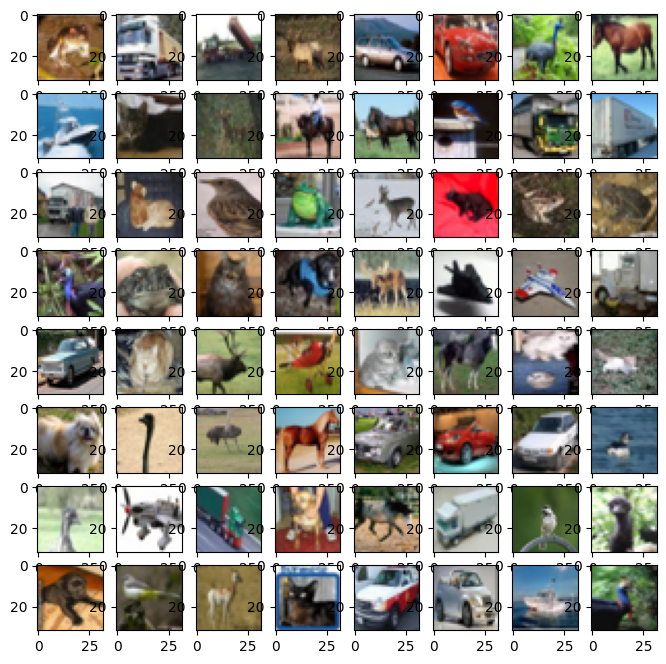

In [16]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(train_images[i],cmap=plt.cm.bone)
plt.show()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


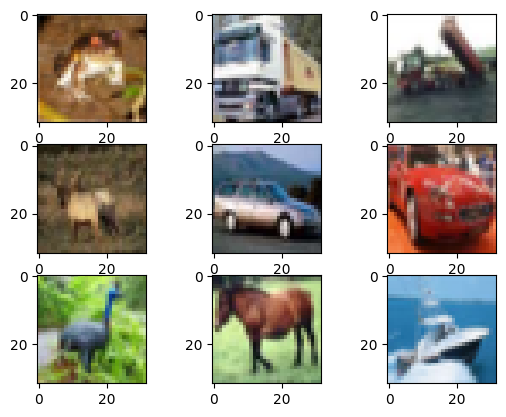

In [17]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

### Our Image initially having (50000, 32x32x3) is reshaped to (50000 x 3072) dimensions, for further analysis

In [18]:
x_train = trainX.reshape(train_images.shape[0],-1)
x_test = testX.reshape(test_images.shape[0], -1)

In [24]:
x_test

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=uint8)

### We use Robust Scaler to scale the dataset. Robust Scaler is considered to be more robust to outliers

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = RobustScaler()
x_train_scaled = sc.fit_transform(x_train)

In [ ]:
x_test_scaled = sc.transform(x_test)

In [ ]:
y_train = trainy
y_test = testy

In [ ]:
# pca = PCA()
# pca.fit_transform(x_train_scaled)

In [ ]:
# k = 0
# total = sum(pca.explained_variance_)
# current_sum = 0

# while(current_sum / total < 0.99):
#     current_sum += pca.explained_variance_[k]
#     k += 1
# k

In [ ]:
# pca_cifar = PCA(n_components=k,whiten=True)
# x_train_pca_cifar = pca_cifar.fit_transform(x_train_scaled)
# x_test_pca_cifar = pca_cifar.transform(x_test_scaled)

In [ ]:
# x_test_pca_cifar.shape

In [ ]:
# y_train.shape

### Let us now fit model and check for evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train.ravel())

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test_scaled)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4014

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

y_pred_lr = lr.predict(x_test_scaled)

precision = precision_score(y_test, y_pred_lr, average = 'weighted')
recall = recall_score(y_test, y_pred_lr, average = 'weighted')
f1 = f1_score(y_test, y_pred_lr, average = 'weighted')

classification_rep = classification_report(y_test, y_pred_lr)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Precision: 0.3985215429260664
Recall: 0.4014
F1 Score: 0.3991216365736525
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.48      0.47      1000
           1       0.47      0.48      0.47      1000
           2       0.32      0.28      0.30      1000
           3       0.28      0.27      0.27      1000
           4       0.36      0.30      0.33      1000
           5       0.33      0.34      0.33      1000
           6       0.39      0.45      0.42      1000
           7       0.45      0.43      0.44      1000
           8       0.49      0.53      0.51      1000
           9       0.44      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[484  41  53  41  20  27  25  51 182  76]
 [ 52 478  31  39  28  40  41  44  78 169]
 [ 97  39 280 105 119  82 131  76  47  24]
 [ 38  50  93 267  61 195 144  54  37  61]
 [ 56  24 137  69 297  92 168 105  26  26]
 [ 40  46  96 172  88 337  89  68  36  28]
 [ 22  41  75 144  91  97 453  36  16  25]
 [ 53  48  66  71  94  87  43 428  31  79]
 [154  72  28  28  12  38  18  22 529  99]
 [ 65 178  19  30  17  27  47  60  96 461]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators = 50)

rf_classifier.fit(x_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred_rf = rf_classifier.predict(x_test_scaled)
rf_classifier_score = accuracy_score(y_test, y_pred_rf)
rf_classifier_score

0.4508

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_rf = rf_classifier.predict(x_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average = 'weighted')
recall_rf = recall_score(y_test, y_pred_rf, average = 'weighted')
f1_rf = f1_score(y_test, y_pred_rf, average = 'weighted')
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_rep_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Classifier Metrics:
Accuracy: 0.4508
Precision: 0.4465691128922581
Recall: 0.4508
F1 Score: 0.44759177397875494
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54      1000
           1       0.50      0.54      0.52      1000
           2       0.33      0.32      0.33      1000
           3       0.31      0.25      0.28      1000
           4       0.38      0.38      0.38      1000
           5       0.42      0.38      0.40      1000
           6       0.47      0.53      0.50      1000
           7       0.48      0.42      0.45      1000
           8       0.59      0.59      0.59      1000
           9       0.47      0.52      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.45     10000
weighted avg       0.45      0.45      0.45     10000

Confusion Matrix:
[[566  39  63  24  30  20  21  24 156  57]
 [ 43 542  24  38  28  31  30 

### This time we check for a validation set of 20-80. We do this for one model i.e, Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Fit the model
logreg = LogisticRegression()
logreg.fit(x_val_train, y_val_train)

# Make predictions
y_val_pred = logreg.predict(x_val_test)

# Calculate evaluation metrics
accuracy_val = accuracy_score(y_val_test, y_val_pred)
precision_val = precision_score(y_val_test, y_val_pred, average = 'macro')
recall_val = recall_score(y_val_test, y_val_pred, average = 'macro')
f1_val = f1_score(y_val_test, y_val_pred, average = 'macro')

print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

Accuracy: 0.4045
Precision: 0.3990480934172669
Recall: 0.40461833231965516
F1 Score: 0.4001986792394578


### Applying Cross - validation with different k values. Choosing only logistic regression model for comparison to reduce computational intensivity

## For k=3

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Calculate evaluation metrics using cross-validation
accuracy_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='accuracy').mean()
# precision_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='precision_macro').mean()
# recall_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='recall_macro').mean()
# f1_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='f1_macro').mean()

print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

Accuracy: 0.40174007392287053
Precision: 0.3990480934172669
Recall: 0.40461833231965516
F1 Score: 0.4001986792394578


## For k=5

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate evaluation metrics using cross-validation
accuracy_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='accuracy').mean()
# precision_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='precision_macro').mean()
# recall_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='recall_macro').mean()
# f1_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='f1_macro').mean()

print("Accuracy:", accuracy_val)
# print("Precision:", precision_val)
# print("Recall:", recall_val)
# print("F1 Score:", f1_val)

Accuracy: 0.40546
Precision: 0.3990480934172669
Recall: 0.40461833231965516
F1 Score: 0.4001986792394578


# For k = 10

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate evaluation metrics using cross-validation
accuracy_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='accuracy').mean()
# precision_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='precision_macro').mean()
# recall_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='recall_macro').mean()
# f1_val = cross_val_score(logreg, x_train, y_train, cv=cv, scoring='f1_macro').mean()

print("Accuracy:", accuracy_val)
# print("Precision:", precision_val)
# print("Recall:", recall_val)
# print("F1 Score:", f1_val)

Accuracy: 0.40574000000000005
Precision: 0.3990480934172669
Recall: 0.40461833231965516
F1 Score: 0.4001986792394578


# As a part 2 of our problem, we repeat the same experiment on grayscale images this time.

In [ ]:
import numpy as np
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert images to grayscale
x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)

# Add a single channel dimension
x_train_gray = np.reshape(x_train_gray, x_train_gray.shape + (1,))
x_test_gray = np.reshape(x_test_gray, x_test_gray.shape + (1,))

# Normalize pixel values to the range [0, 1]
x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0

# Flatten the images
x_train_f = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_f = x_test_gray.reshape(x_test_gray.shape[0], -1)

y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)

x_train = x_train_f
x_test = x_test_f

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())

LogisticRegression()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

y_pred_lr = lr.predict(x_test)

precision = precision_score(y_test, y_pred_lr, average = 'weighted')
recall = recall_score(y_test, y_pred_lr, average = 'weighted')
f1 = f1_score(y_test, y_pred_lr, average = 'weighted')

classification_rep = classification_report(y_test, y_pred_lr)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Precision: 0.3057978481452976
Recall: 0.3124
F1 Score: 0.3077123775021974
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.37      0.39      0.38      1000
           2       0.24      0.20      0.22      1000
           3       0.22      0.16      0.19      1000
           4       0.25      0.22      0.24      1000
           5       0.32      0.32      0.32      1000
           6       0.29      0.31      0.30      1000
           7       0.30      0.30      0.30      1000
           8       0.34      0.40      0.37      1000
           9       0.38      0.45      0.42      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.31     10000
weighted avg       0.31      0.31      0.31     10000



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train.ravel())

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(x_test)

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_rf)
print("Classification Report (Random Forest):\n", classification_rep_rf)

Precision (Random Forest): 0.41392941579556775
Recall (Random Forest): 0.4171
F1 Score (Random Forest): 0.4140226692519401
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.48      0.47      0.48      1000
           1       0.47      0.48      0.48      1000
           2       0.33      0.32      0.33      1000
           3       0.32      0.23      0.27      1000
           4       0.34      0.37      0.35      1000
           5       0.41      0.37      0.39      1000
           6       0.41      0.46      0.43      1000
           7       0.45      0.41      0.43      1000
           8       0.50      0.55      0.52      1000
           9       0.43      0.51      0.47      1000

    accuracy                           0.42     10000
   macro avg       0.41      0.42      0.41     10000
weighted avg       0.41      0.42      0.41     10000



## We observe that there is a drastic reduction in evaluation scores, while performing the experimentation. The models perform better on colored images as compared to the grayscaled version of the same.